# Monte Carlo Simulations as a Decision Making Tool

- Multiple probability simulation
- Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models (Ref: https://www.investopedia.com/terms/m/montecarlosimulation.asp)
- Observing different realizations of a future event (Scenario1, Scenario2, ScenarioX)

- We calculate future data's mean and variance values 
- A larger data set with fictional data 
- Good proxy of different outcomes
- Used for many purposes: pricing, risk, etc.


## Monte Carlo in Corporate Finance 

- currentRevenues = lastYearRevenues * (1 + growthRateOfRevenues)
  - In this formula, lastYearRevenue is availavle
  - Variable is growthRateOfRevenues 
  - -> We can run 1,000 simulations of growthRateOfRevenues
  - -> Then get the idea of "Average", "Maximum" and "Minimum" values

- Example: For corporate finance, monte carlo can allow us to forecast:
  - Revenues, Cogs and Operating Profit
  

In [27]:
# Goal: Predict the firm's future gross profit
# Requirements:
#   Expected revenue
#   Expected COGS (Cost of Goods Sold)
# Solution:
#   Perform 1,000 simulations of the company's expected revenues


import numpy as np
import matplotlib.pyplot as plt

# values are in million $ (x1000,000)
rev_m = 170     # revenue mean. expected revenue for this year
rev_stdev = 20  # standard deviation of the expected revenue of this year

iterations = 1000 # number of simulations 


In [28]:
# future of revenues 
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev 

array([188.9315136 , 187.44589327, 181.44906032, 146.1683134 ,
       213.91233451, 162.49805013, 186.16050132, 191.07578312,
       193.57981781, 172.38643345, 171.96429259, 181.20865163,
       196.3033715 , 159.25049479, 158.67574571, 196.53208226,
       169.62271365, 152.4939813 , 159.67301554, 171.61759375,
       189.76723864, 176.42398236, 147.42926801, 143.56085103,
       150.51700044, 193.2062208 , 174.309502  , 181.84949482,
       188.06350133, 180.20799025, 222.53475422, 182.41491585,
       189.31751307, 169.43331662, 152.61387531, 150.02126857,
       173.14587007, 172.85376238, 165.68781076, 164.27409136,
       185.32190338, 189.23989198, 152.88996928, 175.98050614,
       168.31500109, 188.71401796, 163.13176616, 168.56673737,
       176.75039221, 157.12656367, 151.54519481, 181.3987364 ,
       166.43976448, 172.87062213, 192.77316085, 170.86668405,
       173.4639362 , 149.88340258, 140.58860307, 169.84909694,
       185.86885565, 193.92621048, 166.06525969, 160.70

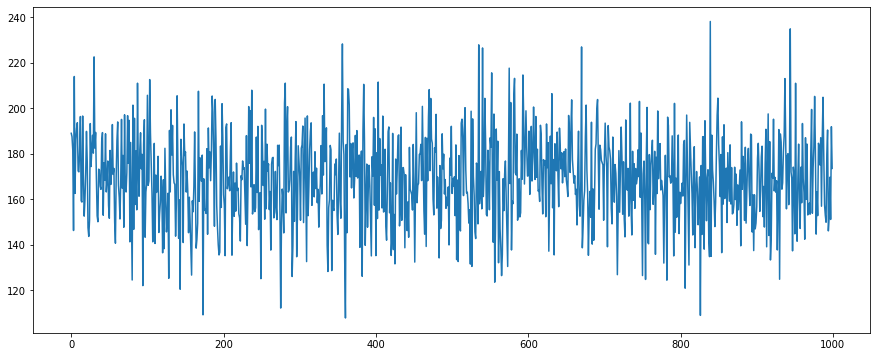

In [29]:
# check the distributions
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

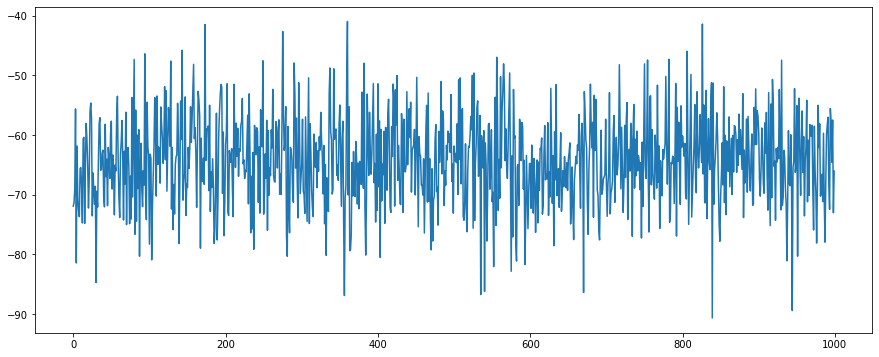

In [30]:
# Estimated percentage of COGS : ~60% of the revenues 
# also, standart deviation is selected 0.1
COGS = - (rev * np.random.normal(0.6, 0.1)) # - because COGS is money spent
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [31]:
COGS.mean() # naturally we will get a different value everytime if we re-run above

-64.29055521624824

In [32]:
COGS.std() 

7.490452856671082

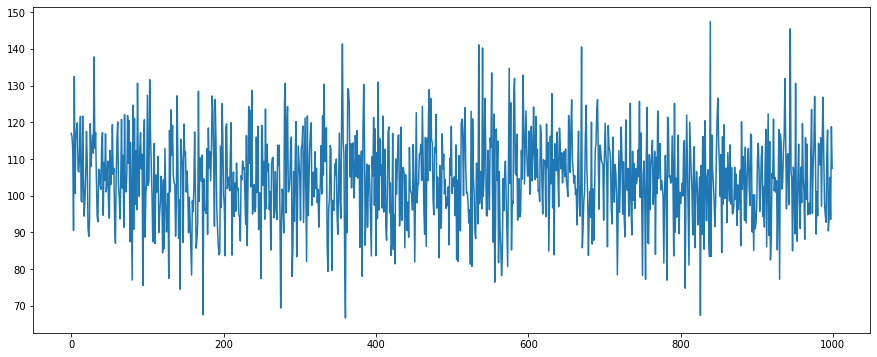

In [33]:
GrossProfit = rev + COGS

plt.figure(figsize=(15,6))
plt.plot(GrossProfit)
plt.show()

In [35]:
print ("Max Gross Profit: %f" % max(GrossProfit))
print ("Min Gross Profit: %f" % min(GrossProfit))
print ("Mean Gross Profit: %f" % GrossProfit.mean())
print ("Standard Deviation: %f" % GrossProfit.std())

Max Gross Profit: 147.471900
Min Gross Profit: 66.698723
Mean Gross Profit: 104.593541
Standard Deviation: 12.186129


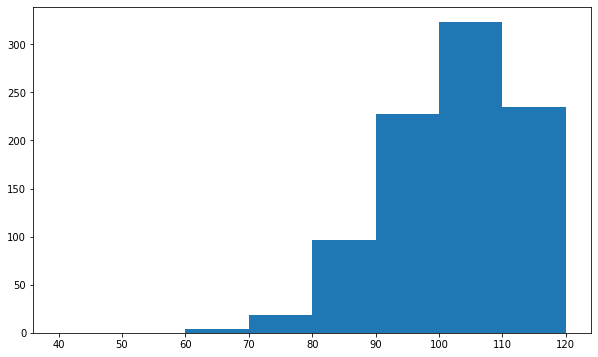

In [36]:
# show the distribution of output using histogram
plt.figure(figsize=(10,6))
# here we are specifying the bins
plt.hist(GrossProfit, bins = [40, 50, 60, 70, 80, 90, 100,110, 120])
plt.show()


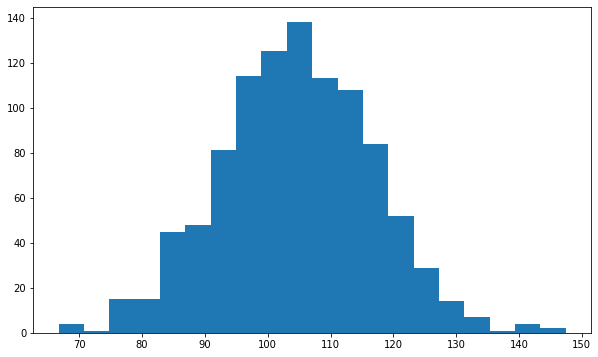

In [37]:
# OR 
plt.figure(figsize=(10,6))
plt.hist(GrossProfit, bins = 20) # we are asking to have 20 bins
plt.show()

## Forecasting Stock Prices with Monte Carlo Simulation

- $priceToday = priceYesterday * e^r$
  - r : log return of share price between yesterday and today
    - $ln(priceToday/priceYesterday)$
 
- Check this for more details: https://towardsdatascience.com/stock-price-prediction-intervals-using-monte-carlo-simulation-6b52b8ac9c27 

